<a href="https://colab.research.google.com/github/WhiteJaeger/googleColab/blob/master/Lab_2%2C_IAD%2C_Kashchikhin_Andrej.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
!ls -la ./drive/My\ Drive/Colab\ Notebooks/All-seasons.csv

-rw------- 1 root root 5533363 Sep 20  2019 './drive/My Drive/Colab Notebooks/All-seasons.csv'


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
data = pd.read_csv('./drive/My Drive/Colab Notebooks/All-seasons.csv')

In [177]:
data.head()

,Season,Episode,Character,Line
0,10,1,Stan,"You guys, you guys! Chef is going away. \n"
1,10,1,Kyle,Going away? For how long?\n
2,10,1,Stan,Forever.\n
3,10,1,Chef,I'm sorry boys.\n
4,10,1,Stan,"Chef said he's been bored, so he joining a gro..."


In [178]:
data.shape

(70896, 4)

In [0]:
data = data.drop(columns=['Season', 'Episode'])

In [180]:
data.Character.value_counts()

Cartman         9774
Stan            7680
Kyle            7099
Butters         2602
Randy           2467
                ... 
UAL Aide           1
Landlord           1
Canadian PM        1
Viewer 3           1
Townswoman 2       1
Name: Character, Length: 3950, dtype: int64

In [181]:
print(data.Character.isna().sum())

print(data.Character.isnull().sum())

0
0


In [182]:
print(data.Line.isna().sum())

print(data.Line.isnull().sum())

0
0


In [183]:
data.describe()

,Character,Line
count,70896,70896
unique,3950,64301
top,Cartman,What?\n
freq,9774,361


In [184]:
data['numLines'] = data.groupby('Character')['Line'].transform('size')

data.head()

,Character,Line,numLines
0,Stan,"You guys, you guys! Chef is going away. \n",7680
1,Kyle,Going away? For how long?\n,7099
2,Stan,Forever.\n,7680
3,Chef,I'm sorry boys.\n,917
4,Stan,"Chef said he's been bored, so he joining a gro...",7680


In [185]:
data.shape

(70896, 3)

In [0]:
data = data[data['numLines'] > 800]

In [187]:
data.shape

(33284, 3)

In [188]:
data['Character'].value_counts()

Cartman         9774
Stan            7680
Kyle            7099
Butters         2602
Randy           2467
Mr. Garrison    1002
Chef             917
Kenny            881
Sharon           862
Name: Character, dtype: int64

In [189]:
print(max([len(line) for line in data.Line]))

print(min([len(line) for line in data.Line]))

1563
3


In [0]:
dataNew = pd.DataFrame(columns=['Character', 'Line', 'numLines'])

for rowIndex, row in data.iterrows():
  if len(row['Line']) < 3:
    continue
  dataNew.loc[rowIndex] = row

In [191]:
dataNew.head()

,Character,Line,numLines
0,Stan,"You guys, you guys! Chef is going away. \n",7680
1,Kyle,Going away? For how long?\n,7099
2,Stan,Forever.\n,7680
3,Chef,I'm sorry boys.\n,917
4,Stan,"Chef said he's been bored, so he joining a gro...",7680


In [192]:
print(max([len(line) for line in dataNew.Line]))

print(min([len(line) for line in dataNew.Line]))

1563
3


In [0]:
import re

def cleanText(text: str) -> str:

    text = text.lower()
    
    text = re.sub(r"\n", "",  text)
    text = re.sub(r"[-()]", "", text)
    text = re.sub(r"\.", " .", text)
    text = re.sub(r"\!", " !", text)
    text = re.sub(r"\?", " ?", text)
    text = re.sub(r"\,", " ,", text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"ohh", "oh", text)
    text = re.sub(r"ohhh", "oh", text)
    text = re.sub(r"ohhhh", "oh", text)
    text = re.sub(r"ohhhhh", "oh", text)
    text = re.sub(r"ohhhhhh", "oh", text)
    text = re.sub(r"ahh", "ah", text)
    text = re.sub(r"[^a-zA-Z0-9]+", ' ', text)
    
    return text

In [0]:
dataNew['Line'] = dataNew['Line'].apply(lambda line: cleanText(line))

In [195]:
dataNew.head()

,Character,Line,numLines
0,Stan,you guys you guys chef is going away,7680
1,Kyle,going away for how long,7099
2,Stan,forever,7680
3,Chef,i am sorry boys,917
4,Stan,chef said he is been bored so he joining a gro...,7680


In [196]:
!pip install nltk

import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
tokenizer = nltk.tokenize.WordPunctTokenizer()

stopWords = nltk.corpus.stopwords.words()

In [0]:
from nltk.stem.lancaster import LancasterStemmer

stemmer = LancasterStemmer()

In [199]:
stemmer.stem('guys')

'guy'

In [0]:
dataNew['Line'] = dataNew['Line'].apply(lambda line: tokenizer.tokenize(line))
dataNew['Line'] = dataNew['Line'].apply(lambda line: ' '.join(line))

In [0]:
def removeStopWords(sentence: str) -> str:
  cleanedSentence = [word for word in sentence.split() if word not in stopWords]
  return ' '.join(cleanedSentence)

In [0]:
dataNew['Line'] = dataNew['Line'].apply(removeStopWords)

In [203]:
dataNew.head()

,Character,Line,numLines
0,Stan,guys guys chef going away,7680
1,Kyle,going away long,7099
2,Stan,forever,7680
3,Chef,sorry boys,917
4,Stan,chef said bored joining group called super adv...,7680


In [204]:
dataNew.Character.value_counts()

Cartman         9774
Stan            7680
Kyle            7099
Butters         2602
Randy           2467
Mr. Garrison    1002
Chef             917
Kenny            881
Sharon           862
Name: Character, dtype: int64

In [205]:
dataNew.Character.describe()

count       33284
unique          9
top       Cartman
freq         9774
Name: Character, dtype: object

In [0]:
from sklearn.preprocessing import LabelEncoder

In [207]:
le = LabelEncoder()
character = le.fit_transform(dataNew['Character'])
print(np.unique(character))

[0 1 2 3 4 5 6 7 8]


In [0]:
dataNew['Character'] = character

In [209]:
dataNew.head()

,Character,Line,numLines
0,8,guys guys chef going away,7680
1,4,going away long,7099
2,8,forever,7680
3,2,sorry boys,917
4,8,chef said bored joining group called super adv...,7680


In [0]:
allLines = [line for line in dataNew.Line]

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(oov_token='<OOV>')

In [0]:
tokenizer.fit_on_texts(allLines)

In [0]:
lines = [tokenizer.texts_to_sequences([sentence])[0] for sentence in dataNew['Line']]

In [214]:
print('\nLine: ', dataNew['Line'][0],'\nLine in sequence format: ', lines[0])

print()

print('\nLine: ', dataNew['Line'][20],'\nLine in sequence format: ', lines[20])


Line:  guys guys chef going away 
Line in sequence format:  [11, 11, 101, 26, 80]


Line:  reverse jew 
Line in sequence format:  [33, 35]


In [0]:
dataBowRaw = dataNew.copy()

dataBowRaw['Line'] = lines

In [216]:
dataBowRaw.head()

,Character,Line,numLines
0,8,"[11, 11, 101, 26, 80]",7680
1,4,"[26, 80, 145]",7099
2,8,[531],7680
3,2,"[69, 178]",917
4,8,"[101, 57, 1960, 2528, 838, 257, 511, 918, 519]",7680


In [217]:
maxLength = max([len(sentence) for sentence in dataBowRaw['Line']])
maxLength

143

In [0]:
lineBow = []

for line_ in dataBowRaw['Line']:
  if len(line_) < maxLength: # Нужно, чтобы все данные были в одном формате - одинаковой длины.
    for i in range(maxLength - len(line_)):
      line_.append(0) # Если меньше - добавим нули.
  lineBow.append(line_)

In [219]:
dataBowRaw['Line'] = lineBow

dataBowRaw.head()

,Character,Line,numLines
0,8,"[11, 11, 101, 26, 80, 0, 0, 0, 0, 0, 0, 0, 0, ...",7680
1,4,"[26, 80, 145, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",7099
2,8,"[531, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",7680
3,2,"[69, 178, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",917
4,8,"[101, 57, 1960, 2528, 838, 257, 511, 918, 519,...",7680


In [220]:
dataBow = pd.DataFrame(np.stack(list(dataBowRaw['Line'])))
dataBow['Character'] = dataBowRaw['Character']

print(dataBow.shape)
print()
dataBow.head()

(33284, 144)



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,Character
0,11,11,101,26,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.0
1,26,80,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0
2,531,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.0
3,69,178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0
4,101,57,1960,2528,838,257,511,918,519,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.0


In [0]:
dataBow.dropna(inplace=True)

In [0]:
import sklearn

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

In [0]:
# Пришлось сделать отдельную функцию, т.к. по каким-то причинам не импортировался модуль.

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    # classes = classes[unique_labels(y_true, y_pred)]
    classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [0]:
target = dataBow['Character'].values

In [0]:
(trainData, testData, 
trainDependentVariables, 
testDependentVariables) = train_test_split(dataBow.drop(columns=['Character']),
                                            target,
                                            test_size=0.3, 
                                            random_state=5)

In [0]:
def trainTestPredictDisplayResults(model: sklearn.base,
                     trainX = trainData, 
                     trainY = trainDependentVariables, 
                     testX = testData, 
                     testY = testDependentVariables):
  model.fit(trainX, trainY)

  predictions = model.predict(testX)

  print("Accuracy:",
      round(metrics.accuracy_score(testY, predictions), 5),
     '\nBalanced accuracy:',
     round(metrics.balanced_accuracy_score(testY, predictions), 5))

  print()
  print(metrics.classification_report(testY, predictions))

  plot_confusion_matrix(testY, predictions)

Accuracy: 0.20789 
Balanced accuracy: 0.11703

              precision    recall  f1-score   support

         0.0       0.11      0.11      0.11       431
         1.0       0.32      0.36      0.34      1447
         2.0       0.07      0.06      0.07        96
         3.0       0.02      0.02      0.02        93
         4.0       0.18      0.18      0.18       935
         5.0       0.04      0.03      0.03       100
         6.0       0.10      0.09      0.09       427
         7.0       0.04      0.03      0.03       113
         8.0       0.20      0.17      0.18       923

    accuracy                           0.21      4565
   macro avg       0.12      0.12      0.12      4565
weighted avg       0.20      0.21      0.20      4565

Confusion matrix, without normalization
[[ 48 143   9  15  88  10  27   9  82]
 [131 523  16  47 299  23 134  23 251]
 [  5  28   6   0  29   1   5   2  20]
 [ 12  34   2   2  16   2   9   0  16]
 [ 75 353  20  31 166  17  85  11 177]
 [  7  34   2

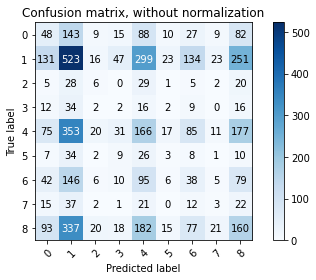

In [227]:
trainTestPredictDisplayResults(DecisionTreeClassifier(random_state=0))

In [0]:
from sklearn.ensemble import RandomForestClassifier

Accuracy: 0.26024 
Balanced accuracy: 0.11336

              precision    recall  f1-score   support

         0.0       0.08      0.02      0.03       431
         1.0       0.32      0.58      0.41      1447
         2.0       0.09      0.01      0.02        96
         3.0       0.03      0.01      0.02        93
         4.0       0.20      0.19      0.20       935
         5.0       0.07      0.01      0.02       100
         6.0       0.08      0.02      0.04       427
         7.0       0.07      0.02      0.03       113
         8.0       0.19      0.16      0.17       923

    accuracy                           0.26      4565
   macro avg       0.13      0.11      0.10      4565
weighted avg       0.20      0.26      0.21      4565

Confusion matrix, without normalization
[[  8 251   1   4  77   2  14   3  71]
 [ 30 842   5   4 289   4  39   7 227]
 [  4  60   1   0  17   0   0   0  14]
 [  5  48   0   1  13   0   3   1  22]
 [ 15 538   1   9 178   4  27   5 158]
 [  2  60   0

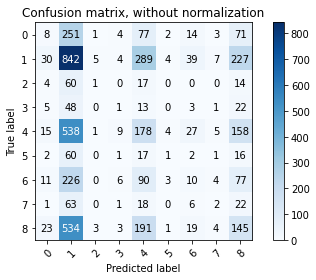

In [229]:
trainTestPredictDisplayResults(RandomForestClassifier(n_estimators=100, n_jobs=-1))

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 3))

vectorizedLines = vectorizer.fit_transform(allLines)

In [231]:
vectorizedLines.shape

(33284, 224364)

In [0]:
# Уменьшаем размерности.

from sklearn.decomposition import TruncatedSVD

# Описания чаще всего длиннее - увеличим значение n_components до 400.
svd = TruncatedSVD(n_components=400, n_iter=3, random_state=42)

truncatedLines = svd.fit_transform(vectorizedLines)

In [233]:
dataTFIDF = pd.DataFrame(truncatedLines)
dataTFIDF['Character'] = dataNew.Character

dataTFIDF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,Character
0,0.002235,0.008529,0.010471,0.004607,0.014203,0.024286,0.009322,0.031200,0.002570,0.081062,0.048322,-0.002590,0.018650,0.036692,0.008207,0.161678,-0.027818,0.006035,0.079909,-0.015863,0.005162,-0.094543,0.182697,0.133654,-0.076607,-0.059376,0.001795,-0.001489,0.000622,0.000534,-0.009638,-0.007439,-0.026562,-0.000706,0.008402,-0.019740,-0.006678,-0.014449,0.054006,-0.050786,...,0.000907,0.005881,0.004822,-0.003737,0.004877,0.018300,0.016733,-0.005735,0.024884,-0.003080,-0.007163,0.027617,-0.002183,-0.012658,-0.002829,0.005456,-0.005430,-0.017363,-0.001505,-0.005795,-0.001081,-0.000213,0.014446,-0.005082,0.014740,-0.013222,-0.006892,-0.004499,0.012674,0.018971,0.013085,0.014874,-0.022518,0.017147,-0.004301,-0.006226,0.012006,-0.000681,-0.000642,8.0
1,0.001167,0.004113,0.009362,0.002728,0.006359,0.013223,0.006160,0.023870,0.001076,0.050456,0.003075,0.000105,0.019553,0.053055,-0.008760,0.212598,-0.033111,-0.014132,-0.014618,-0.000713,0.000095,-0.001794,-0.013238,-0.006665,0.008360,0.001464,0.002349,0.001222,-0.005302,-0.001065,-0.000054,0.000942,-0.002413,0.001506,0.001506,0.000124,-0.000438,-0.000707,0.001645,-0.001353,...,-0.004357,0.001321,-0.001560,0.007214,0.002779,-0.003326,-0.006306,0.000540,0.000466,-0.002198,0.003906,0.005003,-0.003790,0.002613,-0.003398,0.003692,0.005477,0.002516,0.004288,-0.007727,0.001524,-0.000144,0.000790,0.002736,-0.001397,0.003906,0.004447,0.001715,0.000880,0.003206,-0.003267,0.005671,-0.002892,0.000972,-0.003092,-0.002143,0.002509,-0.000531,-0.003954,4.0
2,0.000207,0.000451,0.000580,0.000057,0.000490,0.000787,0.000672,0.000280,0.000366,0.000248,0.000368,0.000331,0.000552,0.001259,0.000934,0.000109,0.000578,0.000842,0.002612,-0.000308,-0.000273,-0.000722,-0.000461,-0.000419,0.000239,0.000148,0.000268,0.000807,0.000018,0.000525,0.000274,0.000549,0.002336,0.002006,0.003059,-0.002113,-0.001773,-0.000235,0.005582,-0.001604,...,-0.017921,-0.003592,-0.006688,0.006408,-0.010378,-0.004702,0.025592,-0.001657,-0.002140,-0.020760,0.012559,-0.016288,-0.011090,-0.021341,0.014945,0.001152,0.000257,0.007129,0.010586,0.018171,-0.008117,-0.042058,0.054529,-0.034137,-0.002608,-0.030305,-0.009388,-0.002781,0.007437,0.061015,0.016125,0.001624,-0.029270,-0.016570,0.016319,-0.015421,-0.015331,-0.038559,-0.024247,8.0
3,0.000747,0.004250,0.002600,0.001345,0.002977,0.005726,0.004790,0.001041,0.001120,0.003175,0.002749,0.001979,0.006258,0.001837,-0.000880,0.000646,0.004250,0.005889,0.011813,0.002100,-0.001667,0.005440,-0.000254,0.000508,-0.002580,-0.000828,-0.005682,-0.000619,-0.001120,0.000324,0.000582,0.001072,0.006781,0.010720,0.011685,-0.010618,-0.005802,0.006596,0.005053,-0.008003,...,0.001745,0.004960,-0.002455,-0.003372,0.004422,0.004096,0.003558,0.003730,0.006771,-0.003512,-0.002482,0.001100,-0.007543,0.002785,-0.006686,0.001443,-0.001304,0.002440,0.004073,-0.000008,-0.000863,0.001014,-0.002432,-0.006633,-0.001967,-0.003185,0.003436,0.001844,0.000816,0.001372,0.003886,-0.002213,0.001649,-0.006103,-0.002272,0.003130,-0.000564,-0.002645,0.007258,2.0
4,0.000598,0.001351,0.001225,0.000557,0.001742,0.001971,0.001065,0.001442,0.000646,0.002992,0.003910,0.000687,0.001029,0.001098,0.000128,0.000015,0.001933,0.003220,0.005745,0.002026,-0.000187,0.001800,-0.000297,-0.000244,0.002179,0.001914,-0.000147,0.000159,-0.000102,-0.000059,0.000561,0.000351,0.006188,0.008881,0.018906,-0.020117,-0.007791,-0.009553,0.040780,-0.031021,...,-0.004066,0.004091,-0.003423,-0.006085,-0.004198,-0.006430,0.008278,-0.000288,0.002308,-0.005721,-0.004942,0.003748,-0.010075,-0.003280,-0.002185,0.002330,0.009173,0.007186,0.018964,-0.016977,0.004291,-0.005757,0.015614,-0.007086,-0.004419,-0.000341,0.004783,-0.008172,0.003283,-0.005674,-0.015763,0.003051,-0.011477,0.008072,0.0

In [0]:
target = dataTFIDF['Character'].values

In [0]:
(trainData, testData, 
trainDependentVariables, 
testDependentVariables) = train_test_split(dataTFIDF.drop(columns=['Character']),
                                            target,
                                            test_size=0.3, 
                                            random_state=5)

Accuracy: 0.20811 
Balanced accuracy: 0.11537

              precision    recall  f1-score   support

         0.0       0.12      0.11      0.11       431
         1.0       0.31      0.36      0.33      1447
         2.0       0.06      0.06      0.06        96
         3.0       0.01      0.01      0.01        93
         4.0       0.19      0.19      0.19       935
         5.0       0.03      0.02      0.02       100
         6.0       0.10      0.09      0.09       427
         7.0       0.04      0.03      0.03       113
         8.0       0.20      0.17      0.18       923

    accuracy                           0.21      4565
   macro avg       0.12      0.12      0.12      4565
weighted avg       0.20      0.21      0.20      4565

Confusion matrix, without normalization
[[ 48 147  13  14  92   9  28   9  71]
 [134 516  28  38 303  20 135  23 250]
 [  7  30   6   1  25   1   4   3  19]
 [ 10  36   2   1  19   1   7   0  17]
 [ 66 352  19  26 177  15  89  15 176]
 [  9  37   4

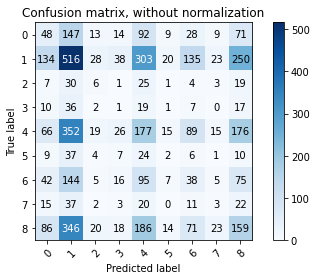

In [236]:
trainTestPredictDisplayResults(DecisionTreeClassifier())

Accuracy: 0.25849 
Balanced accuracy: 0.11302

              precision    recall  f1-score   support

         0.0       0.11      0.03      0.05       431
         1.0       0.31      0.57      0.40      1447
         2.0       0.05      0.01      0.02        96
         3.0       0.03      0.01      0.02        93
         4.0       0.19      0.18      0.19       935
         5.0       0.00      0.00      0.00       100
         6.0       0.08      0.02      0.04       427
         7.0       0.09      0.02      0.03       113
         8.0       0.22      0.17      0.19       923

    accuracy                           0.26      4565
   macro avg       0.12      0.11      0.10      4565
weighted avg       0.21      0.26      0.22      4565

Confusion matrix, without normalization
[[ 14 262   1   3  75   1  15   2  58]
 [ 44 824  11   5 279   3  44   5 232]
 [  6  56   1   0  16   0   0   0  17]
 [  4  51   1   1  18   0   3   1  14]
 [ 20 553   3   8 170   4  31   6 140]
 [  2  60   0

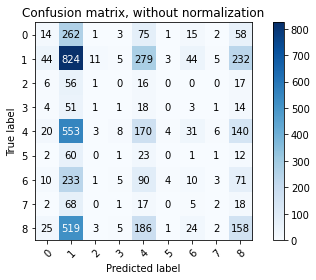

In [237]:
trainTestPredictDisplayResults(RandomForestClassifier(n_estimators=100, n_jobs=-1))

In [0]:
from gensim.models import Word2Vec

In [239]:
allLines[0]

'guys guys chef going away'

In [240]:
sentencesForW2V = []

for sentence in allLines:
  sentencesForW2V.append(sentence.split())

# Обучение модели - заняло довольно много времени.
# Впоследствии загружаем предобученную - она приложена к письму.
w2vModel = Word2Vec(window=2,
                     size=150,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20)

w2vModel.build_vocab(sentencesForW2V)

w2vModel.train(sentencesForW2V, total_examples=w2vModel.corpus_count, epochs=3, report_delay=1)

w2vModel.init_sims(replace=True)

w2vModel.save('word2vec.model')

w2vModel = Word2Vec.load('word2vec.model')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [241]:
# Каждое слово - последовательность из 150.

w2vModel.wv['guy'].shape

(150,)

In [0]:
from functools import reduce

def arrayReducer(firstArray, secondArray): # Для преобразования из двух массивов - в один, усреднение.
  return np.mean((firstArray, secondArray), axis=0)

def transformSentence(sentence, embeddingsVocab, embeddingShape):
  """
  Нужно сделать из W2V - Sentece2Vec - будем это делать с помощью взятия среднего от всех векторов-слов в предложении.
  В результате получится последовательность из 150 - для каждого предложения.
  """
  
  w2vSentence = []
  
  for word in sentence.split():
    if word in embeddingsVocab.wv:
      w2vSentence.append(embeddingsVocab.wv[word])
    else:
      w2vSentence.append(np.zeros(embeddingShape)) # Если слова нет в словаре - заполняем нулями.
  
  if not w2vSentence:
    return np.zeros(embeddingShape)
  transformedSentence = reduce(arrayReducer, w2vSentence)

  return transformedSentence

In [0]:
linesW2V = [transformSentence(sentence, w2vModel, (150,)) for sentence in dataNew['Line']]

In [0]:
dataW2V = dataNew.copy()
dataW2V.drop(columns=['Line'], inplace=True)

In [0]:
dataW2V['w2vLines'] = linesW2V

In [264]:
dataW2V.head()

,Character,numLines,w2vLines
0,8,7680,"[-0.0368789, 0.15488441, -0.054824978, 0.02206..."
1,4,7099,"[-0.03799566, 0.15489098, -0.054373838, 0.0219..."
2,8,7680,"[-0.038121488, 0.15517709, -0.05495182, 0.0227..."
3,2,917,"[-0.037388436, 0.15362646, -0.054224186, 0.021..."
4,8,7680,"[-0.038406134, 0.15524267, -0.055204853, 0.021..."


In [265]:
dataW2V = pd.DataFrame(np.stack(list(dataW2V['w2vLines'])))

dataW2V['Character'] = dataNew['Character']

dataW2V.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,Character
0,-0.036879,0.154884,-0.054825,0.022067,0.038281,-0.002180,0.052939,0.073308,-0.059325,0.116247,0.058061,0.048802,-0.062422,-0.071944,-0.133608,0.081341,-0.070334,-0.096077,-0.112965,-0.051563,-0.044723,-0.015272,0.061932,-0.023525,0.108328,0.076841,-0.175594,-0.081198,-0.168310,0.137507,0.023052,-0.130186,-0.013936,0.175625,0.064168,0.001649,-0.109942,-0.036158,-0.087093,-0.076229,...,0.037558,0.011070,-0.017029,-0.042789,0.088622,-0.032118,0.114274,-0.098960,-0.062580,-0.098432,-0.098995,0.053816,-0.046779,0.045296,0.065840,-0.041785,-0.041966,-0.069141,-0.000907,-0.030977,-0.069619,0.042202,-0.097687,-0.032337,-0.023003,0.055306,-0.049093,-0.090107,-0.167462,-0.146066,-0.005667,0.183137,0.025974,-0.011429,-0.097708,-0.059588,0.002725,0.073589,-0.024771,8.0
1,-0.037996,0.154891,-0.054374,0.021957,0.038675,-0.002763,0.052958,0.073992,-0.058930,0.117060,0.057923,0.049428,-0.062783,-0.071982,-0.133295,0.080984,-0.070538,-0.095751,-0.113494,-0.052005,-0.044696,-0.015306,0.061151,-0.024297,0.107775,0.076670,-0.175472,-0.081840,-0.169006,0.137304,0.022768,-0.129949,-0.014737,0.175158,0.064468,0.001164,-0.110065,-0.036098,-0.088023,-0.075769,...,0.037531,0.010722,-0.017689,-0.042124,0.088433,-0.032014,0.114550,-0.098895,-0.062283,-0.098595,-0.098296,0.053661,-0.046464,0.045582,0.065814,-0.041450,-0.041879,-0.069157,-0.000920,-0.030970,-0.070367,0.042491,-0.097534,-0.031669,-0.022712,0.055200,-0.049065,-0.090630,-0.167127,-0.145600,-0.006165,0.183169,0.026005,-0.011110,-0.098458,-0.058988,0.003441,0.074608,-0.024426,4.0
2,-0.038121,0.155177,-0.054952,0.022755,0.037337,-0.000521,0.054688,0.073377,-0.059035,0.115619,0.057802,0.049105,-0.063608,-0.071569,-0.132007,0.081460,-0.071034,-0.095952,-0.113201,-0.052786,-0.043284,-0.013556,0.060877,-0.022236,0.110012,0.077702,-0.174896,-0.083110,-0.170184,0.136967,0.022248,-0.130028,-0.013243,0.174388,0.065667,0.000022,-0.109507,-0.036820,-0.088395,-0.074917,...,0.035743,0.009092,-0.018563,-0.042685,0.088137,-0.032592,0.115791,-0.099008,-0.060387,-0.097608,-0.099633,0.052695,-0.048210,0.044926,0.066636,-0.041686,-0.040948,-0.068747,-0.001172,-0.030464,-0.069032,0.042837,-0.096835,-0.030869,-0.022331,0.054290,-0.050631,-0.088264,-0.168854,-0.144608,-0.005597,0.183320,0.026269,-0.011283,-0.096308,-0.059638,0.004211,0.072735,-0.025339,8.0
3,-0.037388,0.153626,-0.054224,0.021769,0.037726,-0.002181,0.052889,0.072927,-0.059972,0.117286,0.058869,0.049430,-0.062851,-0.072929,-0.134344,0.081050,-0.070609,-0.095094,-0.113225,-0.052309,-0.044783,-0.015375,0.060663,-0.023664,0.109566,0.077550,-0.176073,-0.081688,-0.167734,0.137290,0.024384,-0.130223,-0.014352,0.174729,0.064224,0.000123,-0.110466,-0.035485,-0.087464,-0.075338,...,0.037158,0.011054,-0.017073,-0.042853,0.087178,-0.032273,0.114072,-0.100100,-0.061790,-0.098884,-0.098606,0.053155,-0.047754,0.044970,0.065730,-0.041307,-0.041393,-0.070525,-0.000819,-0.030339,-0.070026,0.041309,-0.097476,-0.031180,-0.022176,0.056599,-0.048856,-0.089845,-0.167522,-0.145864,-0.005685,0.184018,0.025811,-0.011605,-0.097837,-0.059342,0.003250,0.074886,-0.024318,2.0
4,-0.038406,0.155243,-0.055205,0.021965,0.038168,-0.002409,0.053645,0.074718,-0.060403,0.116742,0.058609,0.049478,-0.063330,-0.072758,-0.133802,0.080481,-0.069563,-0.094751,-0.113801,-0.052403,-0.045116,-0.014414,0.061961,-0.023090,0.107880,0.076795,-0.175979,-0.081674,-0.169017,0.136911,0.024178,-0.128636,-0.013538,0.174682,0.064257,-0.000016,-0.110136,-0.035329,-0.087780,-0.075405,...,0.035986,0.010208,-0.015749,-0.043320,0.087809,-0.032814,0.115228,-0.099452,-0.061794,-0.098848,-0.098619,0.052918,-0.047109,0.046256,0.064642,-0.042152,-0.041892,-0.068747,-0.001123,-0.030597,-0.069095,0.042461,-0.097480,-0.032082,-0.024259,0.05594

In [266]:
dataW2V.shape

(33284, 151)

In [0]:
target = dataW2V.Character.values

In [0]:
(trainData, testData, 
trainDependentVariables, 
testDependentVariables) = train_test_split(dataW2V.drop(columns=['Character']),
                                            target,
                                            test_size=0.3, 
                                            random_state=5)

Accuracy: 0.20898 
Balanced accuracy: 0.11563

              precision    recall  f1-score   support

         0.0       0.11      0.11      0.11       431
         1.0       0.32      0.36      0.34      1447
         2.0       0.04      0.04      0.04        96
         3.0       0.02      0.02      0.02        93
         4.0       0.19      0.19      0.19       935
         5.0       0.04      0.02      0.03       100
         6.0       0.10      0.09      0.09       427
         7.0       0.05      0.04      0.04       113
         8.0       0.20      0.18      0.19       923

    accuracy                           0.21      4565
   macro avg       0.12      0.12      0.12      4565
weighted avg       0.20      0.21      0.20      4565

Confusion matrix, without normalization
[[ 46 144  11  13  92   7  36   9  73]
 [131 518  21  36 307  16 142  21 255]
 [  7  33   4   0  23   1   5   2  21]
 [ 11  33   2   2  16   1   9   0  19]
 [ 69 346  26  24 176  14  88  17 175]
 [  9  33   4

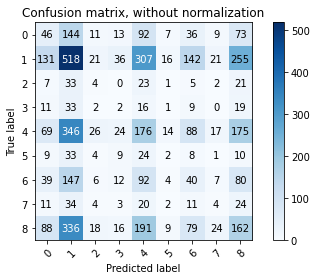

In [269]:
trainTestPredictDisplayResults(DecisionTreeClassifier())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.31369 
Balanced accuracy: 0.11346

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       431
         1.0       0.32      0.96      0.48      1447
         2.0       0.00      0.00      0.00        96
         3.0       0.00      0.00      0.00        93
         4.0       0.25      0.03      0.05       935
         5.0       0.11      0.01      0.02       100
         6.0       0.33      0.01      0.01       427
         7.0       0.00      0.00      0.00       113
         8.0       0.18      0.02      0.03       923

    accuracy                           0.31      4565
   macro avg       0.13      0.11      0.07      4565
weighted avg       0.22      0.31      0.17      4565

Confusion matrix, without normalization
[[   0  409    0    0   10    1    2    0    9]
 [   3 1383    0    0   28    3    0    0   30]
 [   0   92    0    1    1    1    0    0    1]
 [   0   86    0    0    3    1    1    1    1]
 [   0  878    0

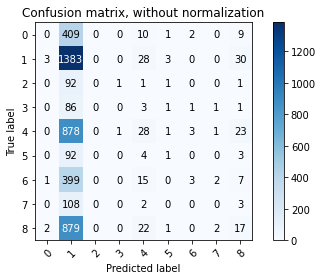

In [275]:
trainTestPredictDisplayResults(sklearn.linear_model.LogisticRegression())

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy: 0.20372 
Balanced accuracy: 0.11239

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       431
         1.0       0.32      0.18      0.23      1447
         2.0       0.00      0.00      0.00        96
         3.0       0.02      0.06      0.03        93
         4.0       0.20      0.42      0.27       935
         5.0       0.00      0.00      0.00       100
         6.0       0.12      0.08      0.10       427
         7.0       0.04      0.01      0.01       113
         8.0       0.21      0.26      0.23       923

    accuracy                           0.20      4565
   macro avg       0.10      0.11      0.10      4565
weighted avg       0.20      0.20      0.18      4565

Confusion matrix, without normalization
[[  0  83   2  26 172   5  34   3 106]
 [  0 256   6  95 647  10  76  11 346]
 [  1  14   0   9  33   2  11   0  26]
 [  0  11   0   6  42   0   5   0  29]
 [  0 172   4  60 395   7  61   2 234]
 [  0  15   0

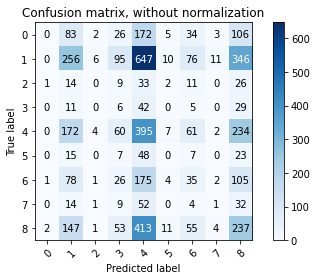

In [276]:
trainTestPredictDisplayResults(sklearn.svm.LinearSVC())

<Figure size 720x432 with 0 Axes>

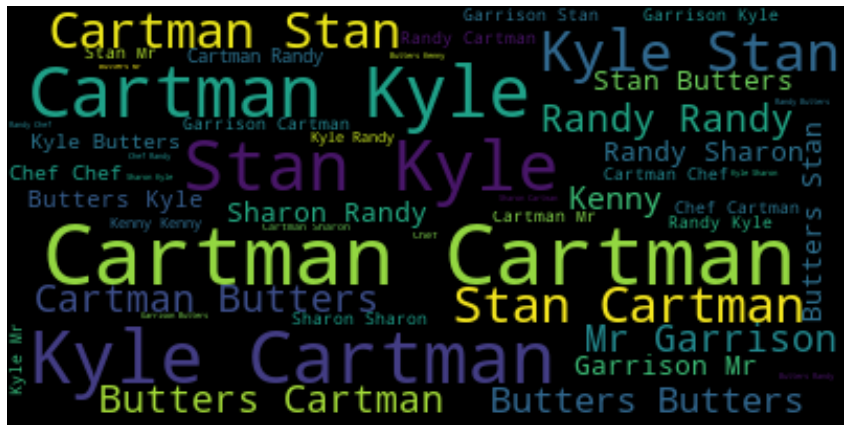

In [281]:
# word cloud
from wordcloud import WordCloud, ImageColorGenerator
charNames = ' '.join([str(char) for char in data.Character])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="black").generate(charNames)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))

# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

<Figure size 720x432 with 0 Axes>

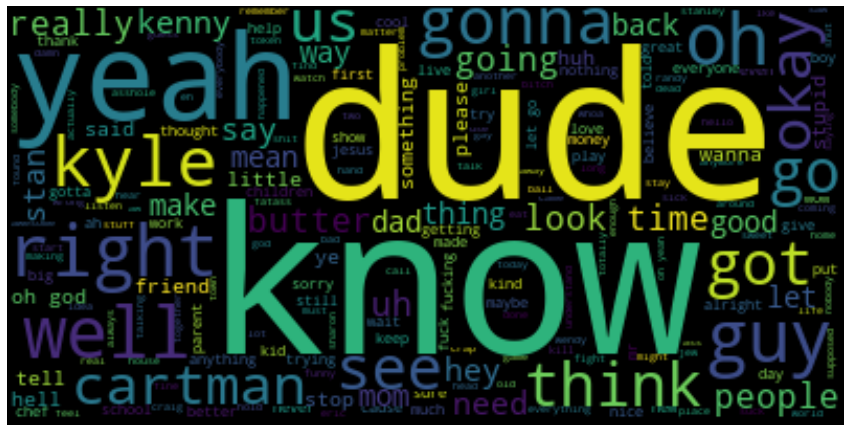

In [282]:
# word cloud
from wordcloud import WordCloud, ImageColorGenerator
allWords = ' '.join([str(line) for line in dataNew.Line])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="black").generate(allWords)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))

# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

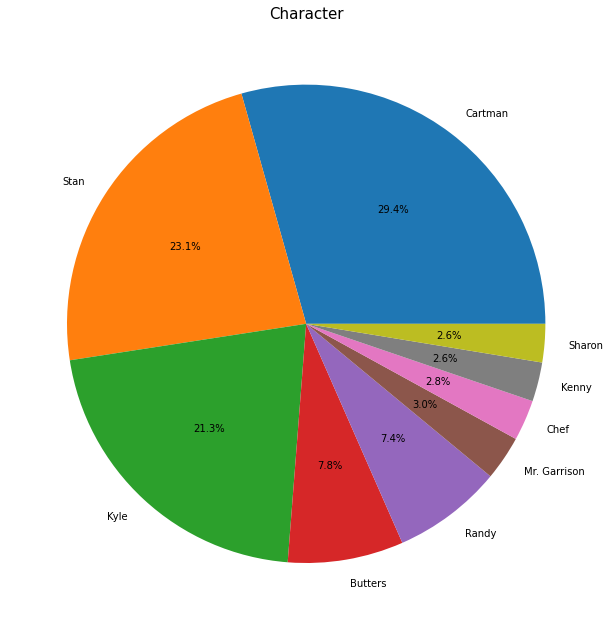

In [283]:
labels = data.Character.value_counts().index
freq = data.Character.value_counts().values
plt.figure(figsize=(11,11))
plt.pie(freq, labels=labels, autopct="%1.1f%%")
plt.title('Character', size=15)
plt.show()